<a href="https://colab.research.google.com/github/Ufelicita/Climate_Change-_Analysis-/blob/main/Climate_Change_Analysis__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Predicting  Medical Insurance Costs with Machine Learning algorithm.



## Introduction
The rising costs of medical insurances have always been of concern for most policy makers and lots of people . This has led to several technological investigation on the reasons for its  high costs . Machine learning predictive proweress seeks to unravell the factors contributing  to its high cost and as a result the build of predicting models .

## Objective
The main aim of this study is to develop a model using machine learning that accurately forecasts medical costs charged by health insurance. By examining the connections between variables and insurance expenses we strive to offer insights for making more informed decisions in healthcare finance.

## Data Overview
The Health insurance cost dataset , sourced  from Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) consists of 1338 entries and 7 features . It includes categorical variables  such as gender , region ,  and smoking status well as numerical variables, like age, BMI , charges and number of children. This analysis will investigate these features to identify trends and predict insurance expenses effectively.

### Methodology
This entails the following procedure that wouldbe used in this analysis :

1. **Data Loading  and Exploratory Data Ananlysis (EDA)**: We start by loading the dataset and doing an analysis to understand how different features are distributed and their connection, to insurance costs.

2. **Data Preprocessing**: Next,  We clean up the data and convert variables ( categorical features) into a format that can be processed by our machine learning model. We might also normalize features to ensure data processing.

3. **Training and Selecting Models**: Using Scikit-Learn, we compare regression models to find the suitable one for our dataset. We tune the model through hyperparameter for optimization.

4. **Model Evaluation and Refinement**: The  performance of the best model is tested  using metrics, like Mean Absolute Error (MAE) Mean Squared Error (MSE) and R Squared. Additionally we use SHAP (SHapley Additive exPlanations) for interpreting the models' results and utilise SHAP(Shapley Additive Explanations)to  understand how each feature influences predicted insurance costs


## Importing  Necessary Libraries

All libraries to be used have to be imported and packages installed.


In [ ]:
!pip install lightgbm
!pip install joblib
!pip install shap




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pandas for  Data manipulation
import pandas as pd

# Import seaborn and matplotlib for  Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import joblib

# Import sklearn machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

import shap

# Import  numpy for numerical computations
import numpy as np


## Data Loading and Exploration Data Analysis
The data is loaded and explored to identify missing values , potential outliers  and general distribution of each feature and their relationship with tsrget variable 'charges'

## Loading Dataset and Exploratory Data Analaysis
In this section , the Health insurance medical cost dataset is loaded and explored for its content and structure. In addition,  it is checked for missing values, outliers, distribution of each feature and their relationship with charges which is the target variable. This is to enable deeper understanding of the Model for prediction.   

In [ ]:
# load the dataset
df_insurance = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
# Display first few rows to understand dataset structure
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Display summary statistics
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Analyse distribution of features in categorical columns
for col in df_insurance.select_dtypes(include=['object', 'category']).columns:
  print(f'Distribution for {col}')
  print (df_insurance [col].value_counts())
  print('\n')


Distribution for sex
sex
male      676
female    662
Name: count, dtype: int64


Distribution for smoker
smoker
no     1064
yes     274
Name: count, dtype: int64


Distribution for region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




### Missing Value Analysis
 A detailed check on missing value is necessary to prevent inaccurate model training and predictions.

In [ ]:
# Check missing values
missing_val = df_insurance.isnull().sum()
print(f'Missing Values: \n{missing_val}')

Missing Values: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Distribution Analysis
This is necessary to examine the spread and central tendencies for both numerical and categorial features. understanding the spread and central tendencies  can guide on selecting the appropriate data transformations or modelling techniques.

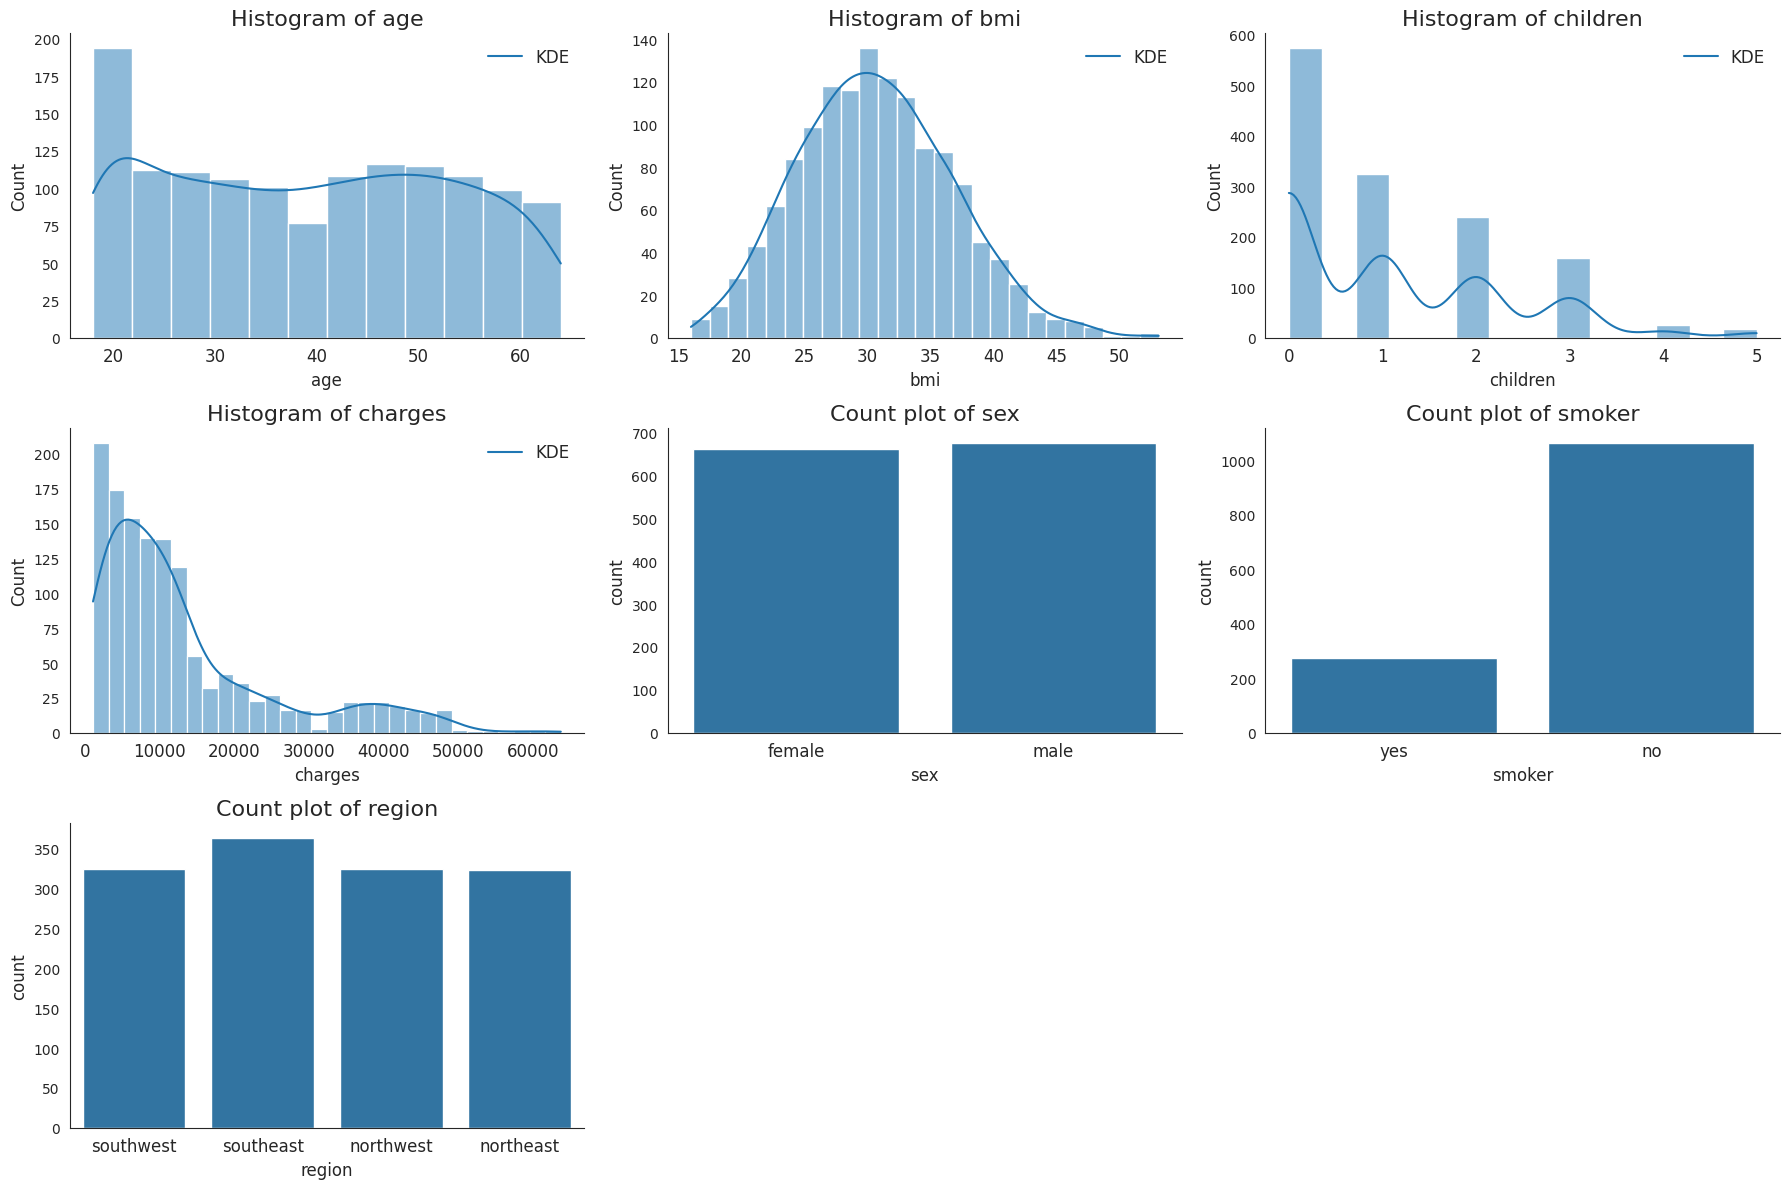

In [ ]:
# Set aesthetic style of plots
sns.set_style('white')

# Set resolution for saving figures
plt.rcParams['savefig.dpi'] = 300

# Set size of plot
plt.rcParams['figure.figsize'] = [14,10]

# set font sizes for labels , titles, legends
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['legend.title_fontsize'] = 'large'
plt.rcParams['legend.fontsize'] = 'large'

# Define numerical and categorical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']
categorical_cols = [ 'sex', 'smoker', 'region']

# Create subplots for numerical data distributions
total_plots = len(numerical_cols) + len(categorical_cols)
n_cols = 3
n_rows = (total_plots + n_cols - 1) // n_cols

# Create figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols *6, n_rows *4))
axes = axes.flatten()

# Plot histograms for numerical features with KDE
for i, col in enumerate(numerical_cols):
  # plot histogram with KDE
  sns.histplot(data=df_insurance, x=col, kde=True, ax=axes[i])
  axes[i].set_title(f'Histogram of {col}')
  # Add a legend manually for KDE
  axes[i].legend(['KDE'], frameon=False)

 # Plot count plots for categorical features
for i, col in enumerate (categorical_cols):
   sns.countplot(x=col, data=df_insurance, ax=axes[i+len(numerical_cols)])
   axes[i+len(numerical_cols)].set_title(f'Count plot of {col}')

# Hide any unused axes
for i in range(total_plots, n_cols * n_rows):
      fig.delaxes(axes[i])

# Adjust Layout
plt.tight_layout()
sns.despine()
plt.show()



### Relationship Analysis
This allows for exploration of the way  different features relate with  the target variable 'charges' and helps with selection of the most relevant predictors.

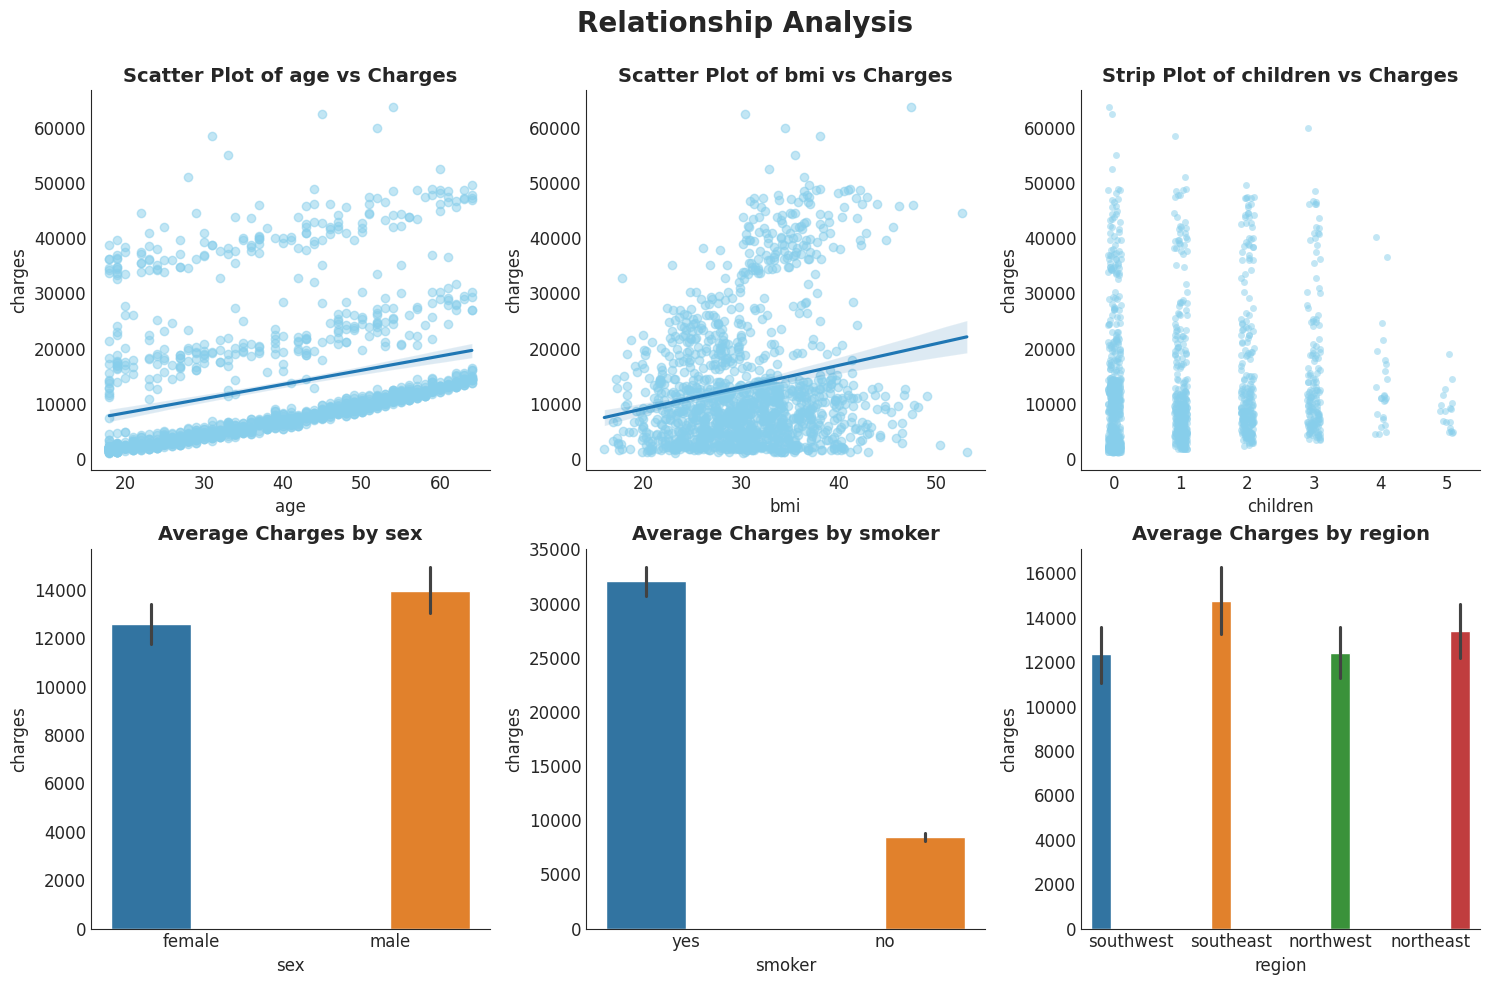

In [ ]:


# Choose a style for the plots
sns.set_style('white')

# Adjust the resolution for saving figures
plt.rcParams['savefig.dpi'] = 300

# Set the size of the plot
plt.rcParams['figure.figsize'] = [15, 10]

# Adjust tick parameters
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Define categorical and numeric columns
num_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']

# Define the plots' titles
titles = ['Scatter Plot of age vs Charges',
          'Scatter Plot of bmi vs Charges',
          'Strip Plot of children vs Charges',
          'Average Charges by sex',
          'Average Charges by smoker', 'Average Charges by region']

# Create the figure and the axes for the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Calculate number of plots based on numerical and categorical data
total_plts = len(num_cols) + len(categorical_cols)
n_cols = 2
n_rows = (total_plts + n_cols - 1) // n_cols


# Plot scatter for numerical features against charges
for index, col in enumerate(num_cols):
    ax = axes[index]
    if col == 'children':
        # Use stripplot because 'children' is a discrete variable
        sns.stripplot(x=df_insurance[col], y=df_insurance['charges'],
                      ax=axes[index], jitter=True, alpha=0.5, color='skyblue')
    else:
        # Use regplot for continuous variables
        sns.regplot(x=df_insurance[col], y=df_insurance['charges'],
                    ax=axes[index], scatter_kws={'alpha': 0.5,
                    'color': 'skyblue'})
        axes[index].set_title(f'Scatter Plot of {col} vs Charges')

    #  Remove spines
    axes[index].spines['top'].set_visible(False)
    axes[index].spines['right'].set_visible(False)
    axes[index].tick_params(axis='both', which='both', length=0)

# Create bar plots for categorical features
for index, col in enumerate(categorical_cols):
    sns.barplot(x=df_insurance[col], y='charges', hue=col, data=df_insurance,
                ax=axes[len(num_cols) + index], dodge='False')
    axes[len(num_cols) + index].set_title(f'Average Charges by {col}')

    # Set style
    axes[len(num_cols) + index].spines['top'].set_visible(False)
    axes[len(num_cols) + index].spines['right'].set_visible(False)
    axes[len(num_cols) + index].tick_params(axis='both', which='both', length=0)

# Hide any unused axes if the total number of plots is odd
if total_plts % n_cols:
    axes[-1].axis('off')

# Set the titles for each subplot
for ax, title in zip(axes, titles):
    ax.set_title(title, fontsize=14, fontweight='bold')

# Adjust Layout and remove spines
plt.tight_layout()
fig.suptitle('Distribution of Insurance Data Features',
             fontsize=20, fontweight='bold')  # Set the title for the figure
sns.despine()

# Adjust the main title
fig.subplots_adjust(top=0.9)
fig.suptitle('Relationship Analysis', fontsize=20,
             fontweight='bold', y=0.98)

# Display final plot
plt.show()


### Correlation Analysis
This quantifies the strength and direction of two continuous variables linear relationship.It helps with identification of multicollinearity which ensures the model becomes more reliable and interpretable.

(4, 4)


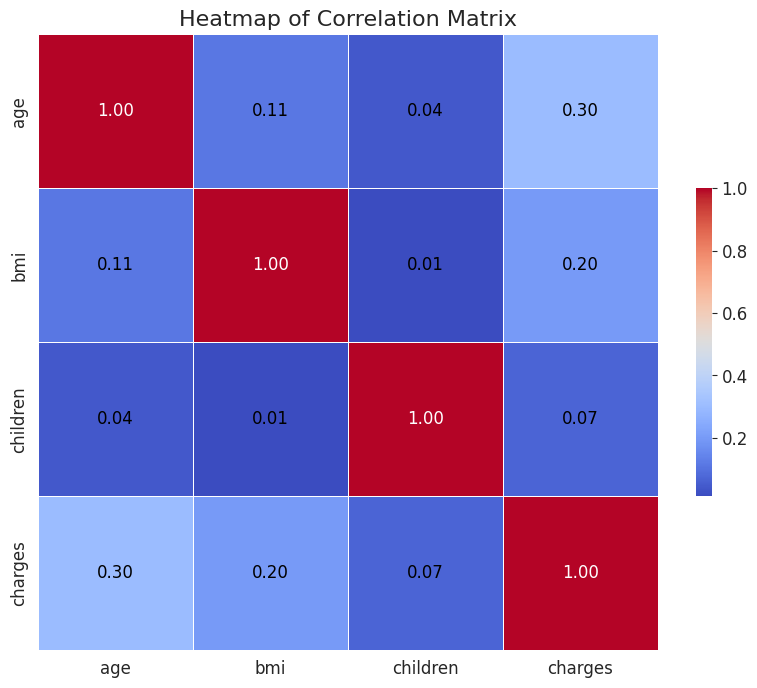

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_insurance[['age', 'bmi', 'children', 'charges']].corr()

# Verify shape of matrix
print(corr_matrix.shape)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)),

# Visulalise the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths =.5, cbar_kws={'shrink':.5}, annot_kws={'size':12}),

# Set map visibility
for text in plt.gca().texts:
  if float(text.get_text()) > 0.5:
    text.set_color('white'),
  else:
      text.set_color('black'),

plt.title('Heatmap of Correlation Matrix', fontsize=16),
plt.xticks(fontsize=12),
plt.yticks(fontsize=12),
plt.show()

### Outlier Analysis
It helps identify data points that are noticably different from majority of the data , which can skew the results and make the model inaccurate.

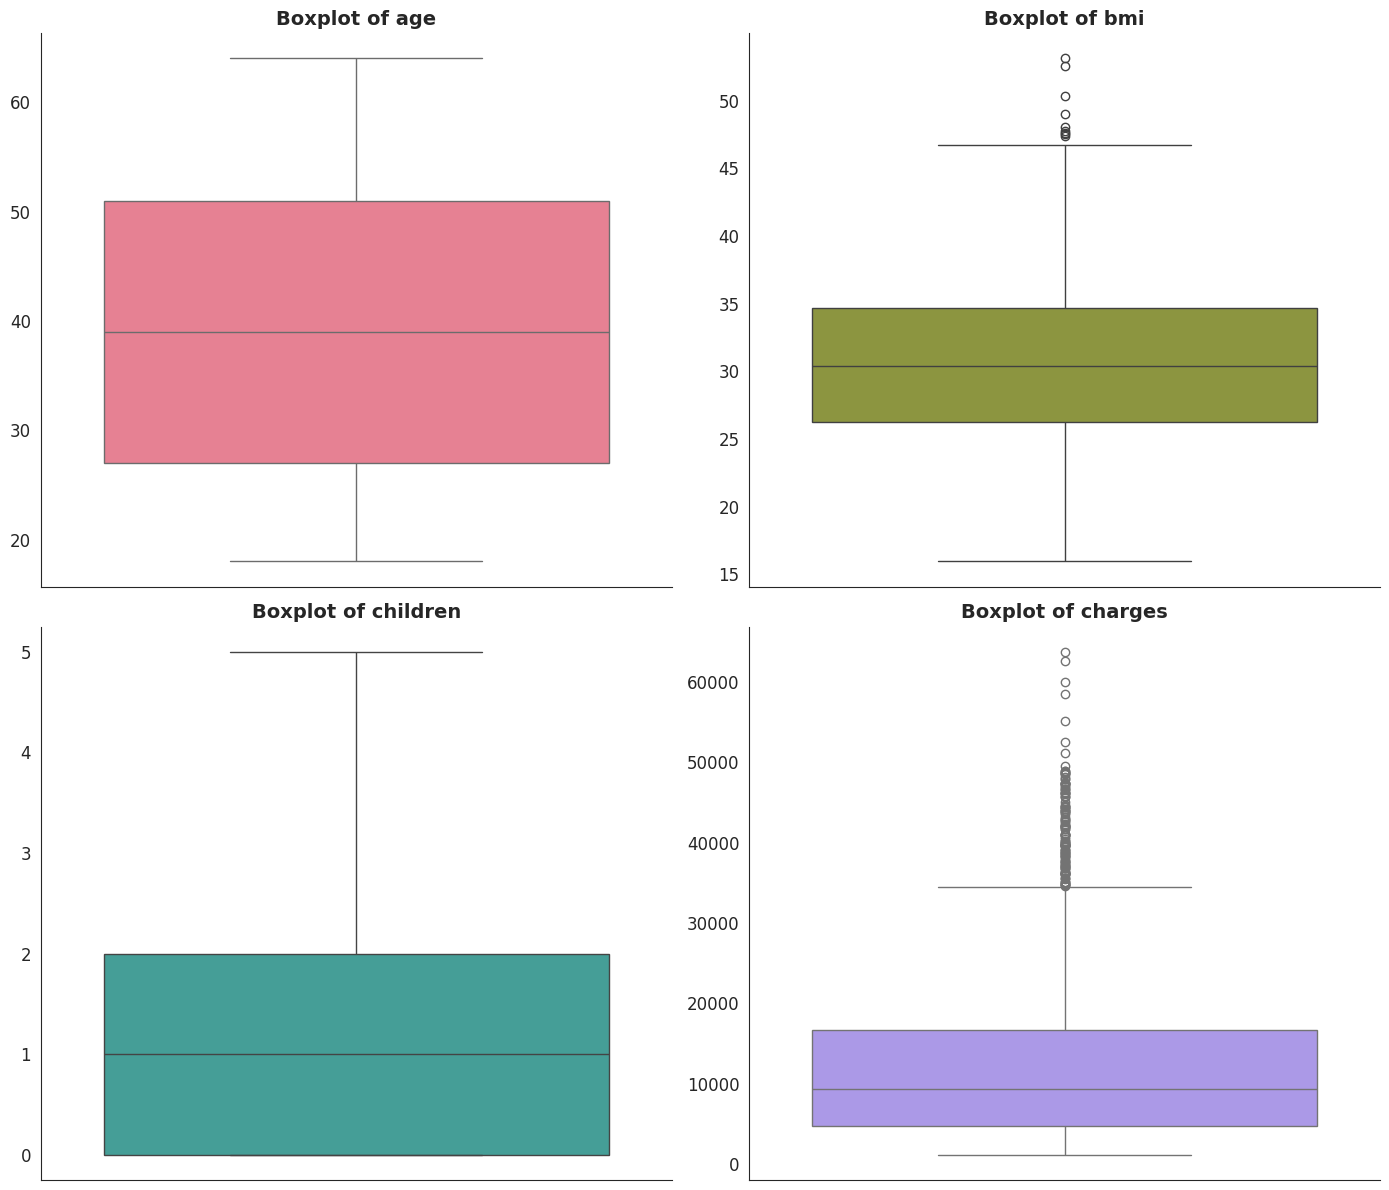

In [ ]:
# Set aesthetic style of plots
sns.set_style('white')

# Set resolution for saving figures
plt.rcParams['savefig.dpi'] = 300

# Set size of plot
plt.rcParams['figure.figsize'] = [14, 10]

# Set font sizes for labels, titles, and ticks
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Define numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Create rows needed for subplots
n_rows = (len(num_cols) + 1) // 2

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(num_cols))

# Create figure and axes for subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 6))
axes = axes.flatten()

# Generate boxplots for each numerical feature with different colors
for i, col in enumerate(num_cols):
    sns.boxplot(y=df_insurance[col], ax=axes[i], color=custom_palette[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('')

plt.tight_layout()
sns.despine()
plt.show()


### EDA Summary and insights
 * Age: The distribution of ages is even overall. There seems to be a trend of decreasing numbers as age increases suggesting that medical expenses vary at different life stages.

* BMI: Most BMI values follow a fairly normal distribution with outliers at higher values . There are some extreme values that stand out.

* Children: The number of children, per individual shows a right-skewed distribution with the majority having fewer than 3 children. It could be beneficial to bin them .

* Smoking Status: There is a difference in costs between smokers and non smokers indicating that smoking status is an important factor in predicting insurance charges.

* Sex: The distribution between genders is fairly balanced with a suggestion that males might incur charges.

* Region: The distribution across regions appears even. There doesn't seem to be any significant impact on medical charges based on region alone.

* Medical Charges: Medical costs show a right skewed distribution with many high cost outliers.



## Data Preprocessing
In line with the EDA
- **Transformation**:  This helped to normalise skewness
- **Standard Scaling**: Age will be  normalised to have a mean zero and unit variance

- **One-Hot Encoding**: Categorical variables will be converteed to Machine learning algorithms

- **Pipeline set up**: All the stps will be consolidated  into a work flow .

These steps will ensure our dataset is optimised for the modelling phase.

In [ ]:

# Define categorical features

X = df_insurance.drop('charges', axis=1)
y = df_insurance['charges']

categorical_features = ['sex', 'smoker', 'region',]

# Identifying numerical columns by data type
numeric_features = ['age', 'bmi', 'children']

# Extract categorical columns
categorical_columns = df_insurance.select_dtypes(include=[
    'object']).columns.tolist()

# Apply one-hot encoding to categorical columns
transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)
# Create Column Transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Define the complete pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Parameters for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 4],
    'regressor__min_samples_leaf': [1, 2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline,
                           param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X, y)

# Output best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Best score found:  20464122.058395438


### Summary Insights of Preprocessing
1.Feature Segregation and Recognition**:

* Target and Predictor Variables: The 'charges column is set apart as the target variable while all other columns are considered as predictors.

* Identification of Categorical Attributes; The attributes ('sex' 'smoker' 'region') are pinpointed for preprocessing.

2. Handling Categorical Information;

* One Hot Encoding : Categorical attributes undergo transformation through One-HotEncoding converting them into a matrix. This step is crucial for integrating data into the model especially after the Exploratory Data Analysis (EDA) emphasized the influence of 'smoker' status on medical charges.
Treatment of Numerical Information;

Standard Scaling Technique; Numeric features ('age' 'bmi' 'children') are standardized using StandardScaler to normalize the data with zero mean and unit variance. This step is particularly important considering the range and distribution patterns observed in 'age' and 'bmi' during EDA suggesting that standardization could boost model performance by treating each feature during training.
Column Transformation Process;

Incorporation of ColumnTransformer; Both categorical and numerical transformations are merged into a preprocessing stage using ColumnTransformer. This unified approach ensures accurate processing for each feature type reducing any data leakage, between training and validation phases.

Creating a Smooth Workflow;

Integrating the pipeline; By combining the preprocessing and modeling tasks within a pipeline you establish an consistent workflow that is essential, for preserving the accuracy of the model training procedure.

In [ ]:
# Parameters for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 4],
    'regressor__min_samples_leaf': [1, 2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline,
                           param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X, y)

# Output best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)

### Summary and Insights of Preprocessing
 * Age: The distribution of ages is even overall. There seems to be a trend of decreasing numbers as age increases suggesting that medical expenses vary at different life stages. Normalizing age data could help improve the accuracy of the model.

* BMI: Most BMI values follow a fairly normal distribution with outliers at higher values . There are some extreme values that stand out. It might be necessary to address these outliers by  transforming them to avoid biasing the model.

* Children: The number of children, per individual shows a right-skewed distribution with the majority having fewer than 3 children. It could be beneficial to bin them .

* Smoking Status: There is a difference in costs between smokers and non smokers indicating that smoking status is an important factor in predicting insurance charges. Using one encoding for this variable is helpful  for accurate model input.

* Sex: The distribution between genders is fairly balanced with a suggestion that males might incur charges. Gender would be included in the model encoding process.

*Region: The distribution across regions appears even. There doesn't seem to be any significant impact on medical charges based on region alone.

*Medical Charges: Medical costs show a right skewed distribution with many high cost outliers. Applying log transformation could help normalize this distribution and lead, to improved model performance.
- Transformation Adjustment; This adjusted  the distribution of features such, as 'bmi' to minimize the influence of outliers and improve model accuracy.

- Normalization Technique: This was used  to  standardize 'age' to have a mean of zero and variance of one ensuring treatment of this feature in model training.

- Data Transformation Process; Applied tailored transformations to data types ( categorical) for optimal preprocessing of each feature.

- Encoding Methodology; Converted variables into a format by machines to avoid misinterpretation as ordinal data by the model.

Workflow Integration; Combines all preprocessing and model training tasks into a process promoting consistency and preventing data leakage, between training and testing phases.

These  steps are crucial for modeling as they guarantee that the information inputted into machine learning algorithms is tidy and properly adjusted as well as encoded. Also, employing a pipeline ensures that our  model can be updated or checked with data without the need to manually carry out each step again thus making the model both adaptable and simpler to manage.


## Model Development  
This involves the Model selection, training , Hypertuning .

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Define categorical and numeric features
categorical_features = ['sex', 'smoker', 'region']
numeric_features = X_train.select_dtypes(include=['int64',
                                                  'float64']).columns.tolist()

X = df_insurance.drop('charges', axis=1)
y = df_insurance['charges']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model pipelines
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor())
])

gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Fit models
lgbm_pipeline.fit(X_train, y_train)
gbr_pipeline.fit(X_train, y_train)

# Predict on the test set
lgbm_predictions = lgbm_pipeline.predict(X_test)
gbr_predictions = gbr_pipeline.predict(X_test)

# Function to calculate metrics
def evaluate_model(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    return mse, rmse, mae, r2

# Evaluate models
lgbm_metrics = evaluate_model(y_test, lgbm_predictions)
gbr_metrics = evaluate_model(y_test, gbr_predictions)

# Print results
print("LGBM Metrics (MSE, RMSE, MAE, R2):", lgbm_metrics)
print("GBR Metrics (MSE, RMSE, MAE, R2):", gbr_metrics)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 13346.089733
LGBM Metrics (MSE, RMSE, MAE, R2): (20899408.800137106, 4571.587120479835, 2605.8881113301554, 0.8653811300142923)
GBR Metrics (MSE, RMSE, MAE, R2): (18773369.027354084, 4332.824601498898, 2410.093536047947, 0.8790755399611824)


## Cross Validation
This will processed on the two models( LGBM and GBR) to determine the better of the two for predicting.

In [ ]:

# Metrics for use in calculation
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred,
                                                             squared=False),
                        greater_is_better=False),
    'R2': 'r2'
}

# Initiate cross-validation for LightGBM
lgbm_cv_results = cross_validate(lgbm_pipeline, X_train, y_train, cv=5,
                                 scoring=scoring, return_train_score=False)

# Initiate  cross-validation for Gradient Boosting Regressor
gbr_cv_results = cross_validate(gbr_pipeline, X_train, y_train, cv=5,
                                scoring=scoring, return_train_score=False)

# Extract and print the mean of the cross-validation scores for each metric
print("LightGBM Cross-Validation Results:")
for metric in scoring.keys():
    mean_score = -np.mean(lgbm_cv_results[
        f'test_{metric}']) if metric != 'R2' else np.mean(lgbm_cv_results[
            f'test_{metric}'])
    print(f"{metric}: {mean_score:.4f}")

print("\nGradient Boosting Regressor Cross-Validation Results:")
for metric in scoring.keys():
    mean_score = -np.mean(gbr_cv_results[
        f'test_{metric}']) if metric != 'R2' else np.mean(gbr_cv_results[
            f'test_{metric}'])
    print(f"{metric}: {mean_score:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 11
[LightGBM] [Info] Start training from score 13308.388711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Numbe

### Insights On Cross validation and Model selection
LightGBM is recognized for its efficiency, in handling datasets. In our study involving 1338 data points with 7 features LightGBM produced outcomes with a Mean Squared Error (MSE) of 20,899,408.80 Root Mean Squared Error (RMSE) of 4571.59 Mean Absolute Error (MAE) of 2605.89 and an R² value of 0.865. LightGBM automatically adjusts its parameters to streamline processes by utilizing 325 bins during training. Alternatively the Gradient Boosting Regressor (GBR) stood out for its capability to rectify errors from trees and manage linear data relationships effectively demonstrating slightly better performance. GBR yielded an MSE of 18,767,115.23 RMSE of 4332.10 MAE of 2407.29 and an R² value of 0.879.





## Hyperparameter Tuning
After Cross Validation , GBR  is selected and tuned to improve its efficiency at prediction. For our hyperparameter space , we will be considering Grid Search because it is robust in its considerations.

In [ ]:
#Define the parameter grid (same as before)
param_grid = {
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

# Grid search setup using the defined pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

# Fit the grid search to your training data (X_train, y_train)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 4, 5]},
             scoring='neg_mean_squared_error')

## Feature Importance
This helps get the features that has the most imapct on predictions

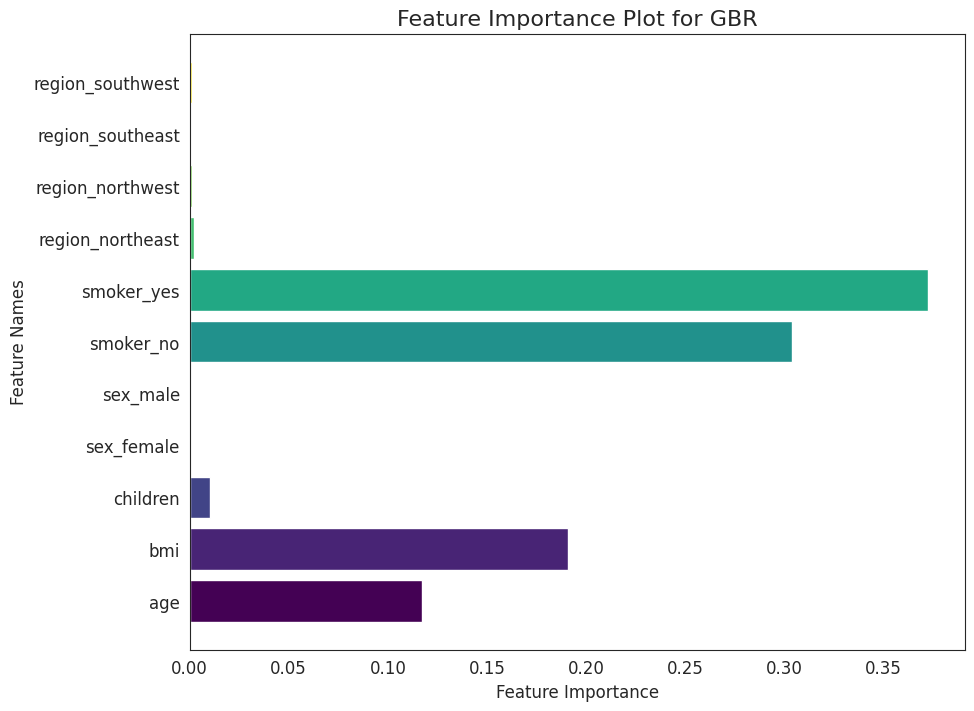

In [ ]:


# Train the GBR model
gbr_pipeline.fit(X_train, y_train)

# Access the trained GBR model from the pipeline
gbr_model = gbr_pipeline.named_steps['regressor']

# Get feature importance from the GBR model
feature_importances_gbr = gbr_model.feature_importances_

# Ensure correct pipeline reference for getting feature names
# Use the same pipeline that you used to fit the model
feature_names_gbr = gbr_pipeline.named_steps[
    'preprocessor'].transformers_[0][2] + \
                    gbr_pipeline.named_steps[
                        'preprocessor'].transformers_[1][2] + \
                    list(gbr_pipeline.named_steps[
                        'preprocessor'].named_transformers_[
                            'cat'].get_feature_names_out())


# For numerical features
numeric_features = gbr_pipeline.named_steps['preprocessor'].transformers_[0][2]

# For categorical features
categorical_features = list(gbr_pipeline.named_steps[
    'preprocessor'].named_transformers_['cat'].get_feature_names_out())

# Combine all feature names
feature_names_gbr = numeric_features + categorical_features

# Plot feature importance
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importances_gbr)))
plt.barh(feature_names_gbr, feature_importances_gbr, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot for GBR')
plt.show()




##Summary of Feature importance
In the Gradient Boosting Regressor model, the body mass index (BMI) emerges as the factor indicating a strong connection, between BMI and insurance costs. Following BMI, age is identified as the crucial factor aligning with the common understanding that older individuals generally face higher insurance expenses. The smoking status, the "smoker_yes" category also exhibits influence implying that smoking plays a vital role in predicting insurance costs likely due to associated health risks.

Interestingly gender features display low levels of importance in the two models. The "sex_male" is more emphasized in the GBR model. This discrepancy may signify interactions to each model between gender and other variables.

Although geographic regions are considered in the models they contribute less to predictions compared to features mentioned earlier. This suggests that location may have an impact, on insurance costs when compared to health metrics and lifestyle choices.

In [ ]:

# Create a pipeline with the best parameters
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        learning_rate=0.01,
        max_depth=3,
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=300,
        random_state=42))
])

# Fit the model
best_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = best_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


MSE: 19399110.60796339
RMSE: 4404.442144921805
MAE: 2606.8127123018444
R²: 0.8750449654463597


In [ ]:

# Save the model to disk
joblib.dump(best_pipeline, 'gradient_boosting_regressor.pkl')

# Load the model from disk (for prediction or further use)
loaded_model = joblib.load('gradient_boosting_regressor.pkl')

Hyperparameter Tuning Using GridSearchCV
 This helps the model perform better


In [ ]:
# Set up the preprocessor as before
preprocessor = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), ['bmi']),
        ('num_standard', StandardScaler(), ['age']),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns.tolist())
    ],
    remainder='passthrough'
)

# Update the pipeline with the best found parameters
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=50))
])

# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['bmi']),
                                                 ('num_standard',
                                                  StandardScaler(), ['age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor',
                 LGBMRegressor(learning_rate=0.01, n_estimators=500,
                               num_leaves=50))])

## Model Evaluation
The trained Gradient Boosting Regressor is used on a sperate test  dataset inorder to evalute how the model handles new , unseen data .
We also examine the differences and significance of features, interpret the models forecasts using SHAP , and maybe fine tune the model by adjusting hyperparameters.



In [ ]:

# Predict on the test set
gbr_predictions = gbr_pipeline.predict(X_test)

# Function to calculate metrics
def evaluate_model(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    return mse, rmse, mae, r2

# Evaluate models
gbr_metrics = evaluate_model(y_test, gbr_predictions)

# Print result
print("GBR Metrics (MSE, RMSE, MAE, R2):", gbr_metrics)


y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Updated Mean Squared Error: {mse}")
print(f"Updated R² Score: {r2}")


GBR Metrics (MSE, RMSE, MAE, R2): (18722400.627547648, 4326.938944282395, 2404.8693108864877, 0.8794038415151899)
Updated Mean Squared Error: 19569690.05996319
Updated R² Score: 0.8739462160371972


In [ ]:
# Get the names of the steps in the pipeline
step_names = gbr_pipeline.named_steps.keys()

# Print the step names to identify the correct one
print(step_names)


dict_keys(['preprocessor', 'regressor'])


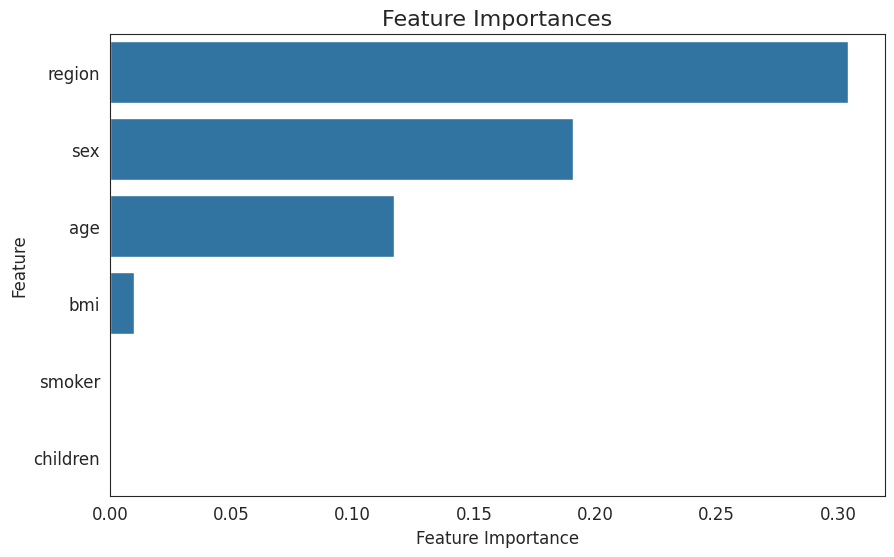

In [ ]:
# Get feature importances
feature_importances = gbr_pipeline.named_steps['regressor'].feature_importances_

# Extract feature names
feature_names = X_train.columns

# Zip feature importances and feature names together
importance_names = list(zip(feature_importances, feature_names))

# Sort by importance
importance_names.sort(reverse=True)

# Extract sorted feature importances and names
sorted_importances, sorted_names = zip(*importance_names)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_importances), y=list(sorted_names))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


##Model Refinement
To improve model's performance further , we experiment with different hyperparameter.

In [ ]:
# Define hyperparameters grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 5, 7],
    # Add more hyperparameters to tune
}

# Perform grid search
grid_search = GridSearchCV(gbr_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Update the pipeline with the best hyperparameters
gbr_pipeline.set_params(**best_params)

# Fit the model with updated parameters
gbr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', GradientBoostingRegressor())])

Interpreting the Model Predictions using SHAP

In [ ]:


# Create a SHAP explainer
explainer = shap.Explainer(model, X_encoded)

# Compute SHAP values
shap_values = explainer(X_encoded)


NameError: name 'model' is not defined

In [ ]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Extract the GBR model and preprocessor from the pipeline
gbr_model = best_estimator.named_steps['regressor']
preprocessor = best_estimator.named_steps['preprocessor']

# Preprocess the feature matrix X
X_encoded = preprocessor.transform(X)

# Compute SHAP values
explainer = shap.TreeExplainer(gbr_model)
shap_values = explainer.shap_values(X_encoded)

# Plot the SHAP summary with a title
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_encoded, plot_type='bar', show=False)
plt.title('SHAP Summary Plot for GradientBoostingRegressor', fontsize=16)
plt.show()

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes = np.linspace(0.1, 1.0, 5)

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")

    return fig, ax
 #Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Set up cross-validation configuration
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Plot the learning curve and store the figure and axis objects
fig, ax = plot_learning_curve(best_estimator, "Learning Curves (GradientBoostingRegressor)", X, y, cv=cv, n_jobs=-1)

# Show the plot
plt.show()

# Conclusion
Our study aimed to use machine learning regression methods for  predictive insights in healthcare insurance  costs.

With  the aid of the  exploratory data analysis , preprocessing the data and model refinement,  we ensured that the Gradient Boosting Regressor, a robust  machine learning algorithm,  could predict  effectively. The model's R value of 0.874,  insights from the feature imporance, residula anbalysis  and SHAP values was an attestation to Gradient Boosting regressor's strength at predicting .

In addition ,  highlights of the significance impact of a  certain lifestyle and demographic factors  in prediction was revelaed.

Consequently , we can reliably attest to fact that  building Machine learning regression techniques  has the ability to reveal  patterns in the data that traditional analysis might omit . This underscores the power of these techniques in healthcare finance—turning data into insights for making informed decisions.

Looking forward , including data and fine tuning machine learning models can enhance predictive accuracy even further. These techniques go beyond research; they are essential, for taking a data driven approach to managing healthcare expenses.
This research shows how machine learning is changing the game, in forecasting medical insurance expenses paving the way, for more healthcare financial planning.

In [ ]:
model.summary()